Descriptive Statistics:
  Mean: 1.99
  Median: 2.20
  Mode: 0.4666666666666659
  Standard Deviation: 1.08
  Skewness: -0.02
  Kurtosis: -1.24



<ipython-input-2-63577b73d901>:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"  Mode: {stats.mode(diff)[0][0]}")


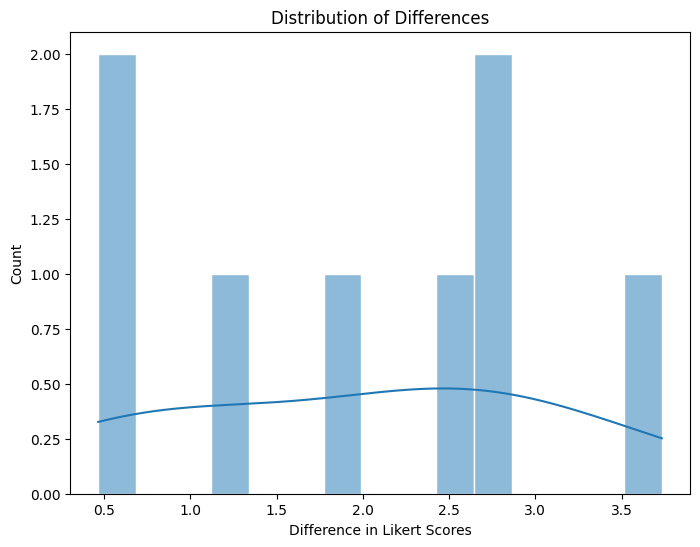

Normality Test (Shapiro-Wilk):
  Shapiro-Wilk p-value: 0.6585

Paired t-test result:
  t-statistic: 4.89
  p-value: 0.0018


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('likert.csv', header=None)

# Calculate averages per continuation
avg_originals = df[df.columns[::2]].mean(axis=0)  # Originals are at even indices
avg_generated = df[df.columns[1::2]].mean(axis=0)  # Generated are at odd indices

# Reset index for both series to ensure correct subtraction
avg_originals.reset_index(drop=True, inplace=True)
avg_generated.reset_index(drop=True, inplace=True)

# Calculate the difference in averages
diff = avg_originals - avg_generated

# # Calculate the mean Likert scores per condition
# mean_originals = avg_originals.mean()
# mean_generated = avg_generated.mean()

# Print descriptive statistics
print("Descriptive Statistics:")
print(f"  Mean: {np.mean(diff):.2f}")
print(f"  Median: {np.median(diff):.2f}")
print(f"  Mode: {stats.mode(diff)[0][0]}")
print(f"  Standard Deviation: {np.std(diff):.2f}")
print(f"  Skewness: {stats.skew(diff):.2f}")
print(f"  Kurtosis: {stats.kurtosis(diff):.2f}")
print()

# Plot histogram for visual inspection of normality
plt.figure(figsize=(8, 6))
sns.histplot(diff, kde=True, bins=15, edgecolor='white')
plt.title("Distribution of Differences")
plt.xlabel("Difference in Likert Scores")
plt.ylabel("Count")
plt.show()

# Shapiro-Wilk test for normality
_, p_shapiro = stats.shapiro(diff)
print(f"Normality Test (Shapiro-Wilk):")
print(f"  Shapiro-Wilk p-value: {p_shapiro:.4f}")
print()

# If the differences are normally distributed, perform a paired t-test
if p_shapiro > 0.05:
    t_stat, p_ttest = stats.ttest_rel(avg_originals, avg_generated)
    print("Paired t-test result:")
    print(f"  t-statistic: {t_stat:.2f}")
    print(f"  p-value: {p_ttest:.4f}")
else:
    # If the differences are not normally distributed, perform a Wilcoxon signed-rank test
    w_stat, p_wilcoxon = stats.wilcoxon(avg_originals, avg_generated)
    print("Wilcoxon signed-rank test result:")
    print(f"  W-statistic: {w_stat:.2f}")
    print(f"  p-value: {p_wilcoxon:.4f}")


Descriptive Statistics:
  Mean: 0.18
  Median: 0.07
  Mode: -1.189903846
  Standard Deviation: 1.20
  Skewness: 0.87
  Kurtosis: -0.04



<ipython-input-12-fd4ae08f9162>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"  Mode: {stats.mode(diff)[0][0]}")


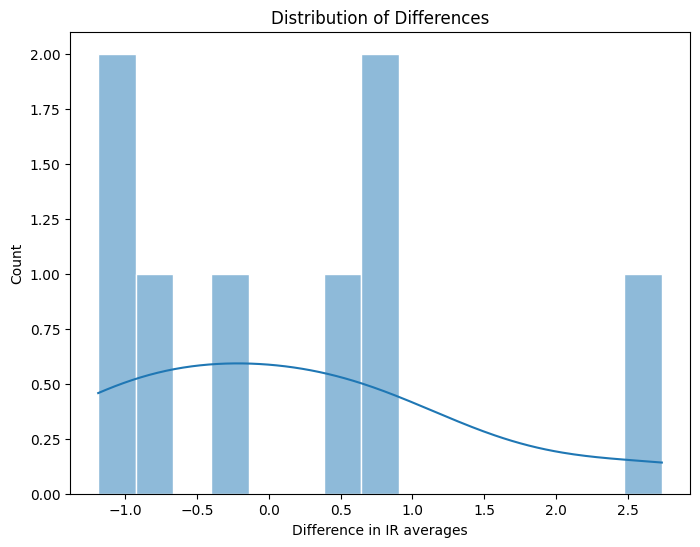

Normality Test (Shapiro-Wilk):
  Shapiro-Wilk p-value: 0.2982

Paired t-test result:
  t-statistic: 0.39
  p-value: 0.7047


In [ ]:
# Load data
df = pd.read_csv('ir_avg.csv', header=None)

# Separate original and generated averages
avg_originals = df[df.columns[::2]].iloc[1].values.astype(float)  # Originals are at even indices
avg_generated = df[df.columns[1::2]].iloc[1].values.astype(float)  # Generated are at odd indices

# Calculate the difference
diff = avg_originals - avg_generated

# Print descriptive statistics
print("Descriptive Statistics:")
print(f"  Mean: {np.mean(diff):.2f}")
print(f"  Median: {np.median(diff):.2f}")
print(f"  Mode: {stats.mode(diff)[0][0]}")
print(f"  Standard Deviation: {np.std(diff):.2f}")
print(f"  Skewness: {stats.skew(diff):.2f}")
print(f"  Kurtosis: {stats.kurtosis(diff):.2f}")
print()

# Plot histogram for visual inspection of normality
plt.figure(figsize=(8, 6))
sns.histplot(diff, kde=True, bins=15, edgecolor='white')
plt.title("Distribution of Differences")
plt.xlabel("Difference in IR averages")
plt.ylabel("Count")
plt.show()

# Shapiro-Wilk test for normality
_, p_shapiro = stats.shapiro(diff)
print(f"Normality Test (Shapiro-Wilk):")
print(f"  Shapiro-Wilk p-value: {p_shapiro:.4f}")
print()

# If the differences are normally distributed, perform a paired t-test
if p_shapiro > 0.05:
    t_stat, p_ttest = stats.ttest_rel(avg_originals, avg_generated)
    print("Paired t-test result:")
    print(f"  t-statistic: {t_stat:.2f}")
    print(f"  p-value: {p_ttest:.4f}")
else:
    # If the differences are not normally distributed, perform a Wilcoxon signed-rank test
    w_stat, p_wilcoxon = stats.wilcoxon(avg_originals, avg_generated)
    print("Wilcoxon signed-rank test result:")
    print(f"  W-statistic: {w_stat:.2f}")
    print(f"  p-value: {p_wilcoxon:.4f}")


Correlation between IR and Likert averages: -0.2726304278396933


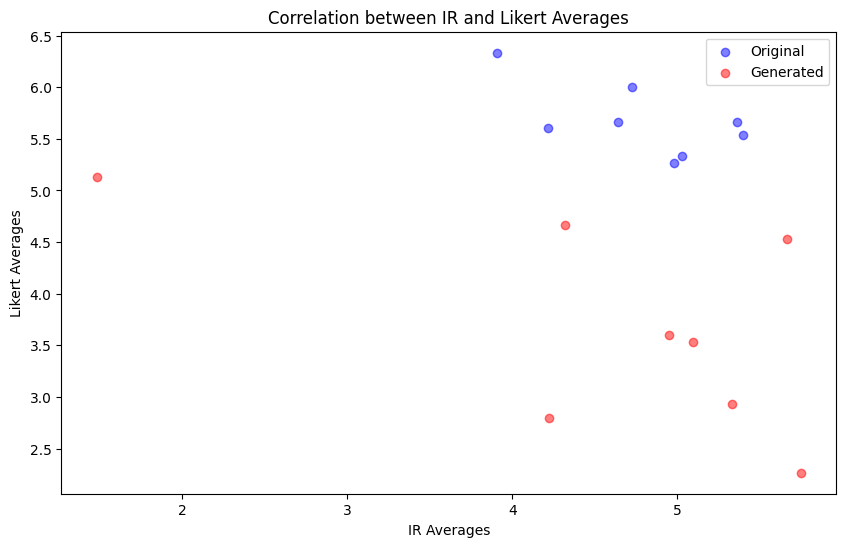

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load IR data
df_ir = pd.read_csv('ir_avg.csv', header=None)

# Take only the numerical values (even-indexed columns)
avg_ir_originals = df_ir[df_ir.columns[::2]].iloc[1, :].reset_index(drop=True)
avg_ir_generated = df_ir[df_ir.columns[1::2]].iloc[1, :].reset_index(drop=True)

# Convert to float for correlation computation
avg_ir_originals = pd.to_numeric(avg_ir_originals)
avg_ir_generated = pd.to_numeric(avg_ir_generated)

# Load Likert data
df_likert = pd.read_csv('likert.csv', header=None)

# Compute the mean of the Likert data
avg_likert_originals = df_likert[df_likert.columns[::2]].mean(axis=0)  # Originals are at even indices
avg_likert_generated = df_likert[df_likert.columns[1::2]].mean(axis=0)  # Generated are at odd indices

# Reset index for both series to ensure correct correlation
avg_likert_originals.reset_index(drop=True, inplace=True)
avg_likert_generated.reset_index(drop=True, inplace=True)

# Concatenate all IR and Likert averages
all_ir_avgs = pd.concat([avg_ir_originals, avg_ir_generated])
all_likert_avgs = pd.concat([avg_likert_originals, avg_likert_generated])

# Compute the correlation
correlation, _ = stats.pearsonr(all_ir_avgs, all_likert_avgs)
print(f"Correlation between IR and Likert averages: {correlation}")

# Create scatter plot with labels
plt.figure(figsize=(10, 6))

# Plot original data in blue
plt.scatter(avg_ir_originals, avg_likert_originals, alpha=0.5, color='blue', label='Original')

# Plot generated data in red
plt.scatter(avg_ir_generated, avg_likert_generated, alpha=0.5, color='red', label='Generated')

plt.title('Correlation between IR and Likert Averages')
plt.xlabel('IR Averages')
plt.ylabel('Likert Averages')

# Add a legend to explain the colors
plt.legend()

plt.show()
